## Project steps 

* Problem definition
* data
* Evaluation
* Features
* Modelling
* Experimentation

## 1- Problem defination

We are going to work on a classification problem whether a patient has a heart disease or not


## 2- Data

The following data is collected from the following resources:

* http://archive.ics.uci.edu/ml/datasets/Heart+Disease
* https://www.kaggle.com/ronitf/heart-disease-uci

## 3- Evaluation

We will pursue our model if we reach the accuracy of 95%

## Features

Features includes:


* age age in years
* sex(1 = male; 0 = female)
* cp chest pain type
* trestbps resting blood pressure (in mm Hg on admission to the hospital)
* chol serum cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg resting electrocardiographic results
* thalach maximum heart rate achieved
* exang exercise induced angina (1 = yes; 0 = no)
* oldpeak ST depression induced by exercise relative to rest
* slope the slope of the peak exercise ST segment
* ca number of major vessels (0-3) colored by flourosopy
* thal 3 = normal; 6 = fixed defect; 7 = reversable defect
* target 1 or 0

## Preparing the necessary tools

we are going to use pandas , numpy and matplotlib for data analysing and data manipulation.


In [1]:
# Importing the standard tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Impoting the scikit learn model

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import the tools for training and testing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


# Import the tools for evaluating 

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Import the data

data = pd.read_csv('heart-disease.csv')

## Data exploration

* what question are you trying to solve
* What type of data do we have and how we treat different types?
* Whats missing from the data and how do we deal with it?
* where were the outliers and why should care about them?
* HOw you add, change remove features to get more out of it?


In [3]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

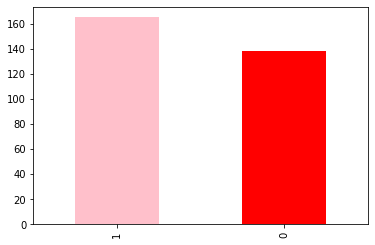

In [6]:
data['target'].value_counts().plot(kind= 'bar', color = ['pink', 'red'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Comparing columns

In [9]:
# We are going to compare sex and target columns

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
0,24,114
1,72,93


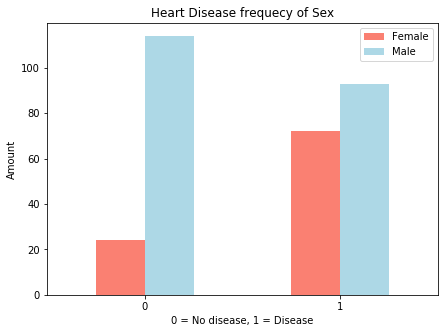

In [12]:
pd.crosstab(data.target,data.sex).plot(kind = 'bar', color = ['salmon', 'lightblue'], figsize = (7,5))
plt.title('Heart Disease frequecy of Sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation = 0);

In [13]:
data.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
# Compare sex attribute with target
data.sex.value_counts()


1    207
0     96
Name: sex, dtype: int64

In [17]:
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text xticklabel objects>)

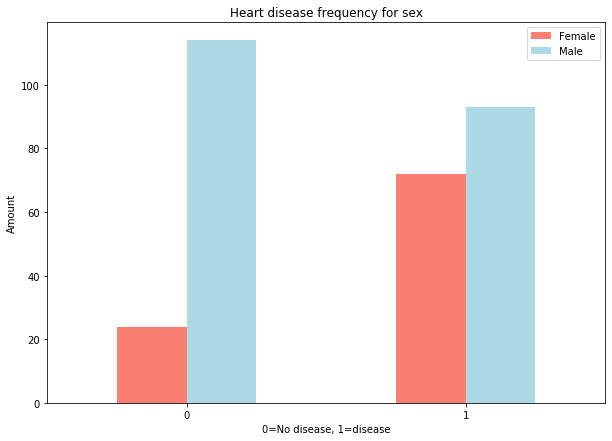

In [18]:
# Creating a plot of crosstab
pd.crosstab(data.target,data.sex).plot(kind = 'bar',
                                       color = ['salmon','lightblue'], figsize= (10,7))
plt.title('Heart disease frequency for sex')
plt.xlabel('0=No disease, 1=disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation = 0)

In [19]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
data.age[data.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

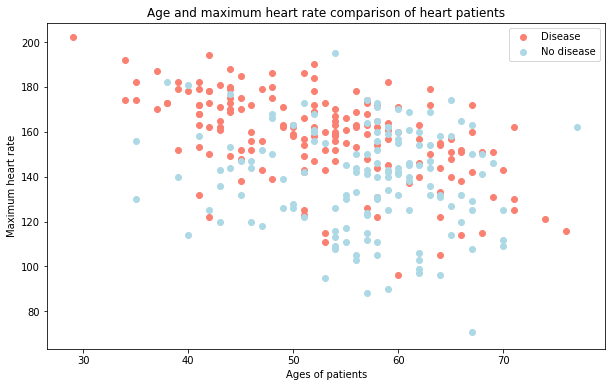

In [21]:
# Comparison of  age, thalach to target column
plt.figure(figsize = (10,6));
plt.scatter(data.age[data.target ==1],
            data.thalach[data.target ==1],
            color = ['salmon']
            );

plt.scatter(data.age[data.target ==0],
            data.thalach[data.target==0],
            color = ['lightblue']
           );
plt.title('Age and maximum heart rate comparison of heart patients')
plt.xlabel('Ages of patients')
plt.ylabel('Maximum heart rate')
# plt.legend('Disease,no Disease');
plt.legend(['Disease' , 'No disease']);

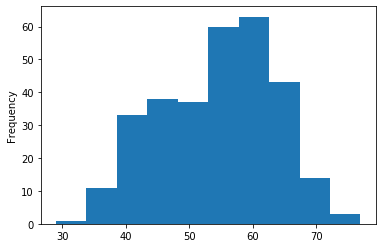

In [22]:
# The data is normally distributed 
# we use normal distribution to check every columns to check outliers
data.age.plot.hist();

In [23]:
# Compare chest pain type with target
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


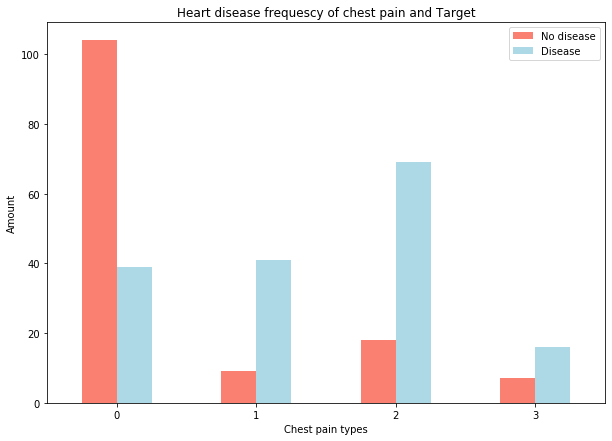

In [24]:
pd.crosstab(data.cp,data.target).plot(kind = 'bar',
                                      color = ['salmon','lightblue'], figsize = (10,7));
plt.title('Heart disease frequescy of chest pain and Target')
plt.xlabel('Chest pain types')
plt.ylabel('Amount')
plt.legend(['No disease', 'Disease'])
plt.xticks(rotation = 0);

In [25]:
# Lets make a correlation matrix
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


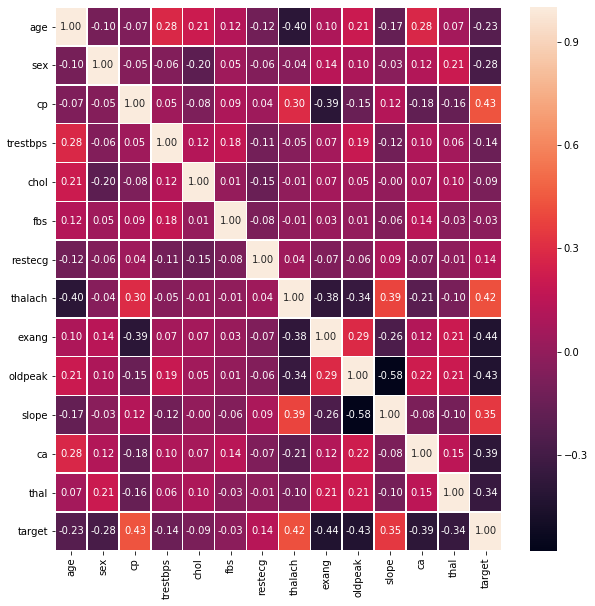

In [26]:
import seaborn as sns
# Make correlation matrix more pretier
corr_mat = data.corr()
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corr_mat,
                 linewidths = 0.5,
                 annot = True,
                 fmt = '.2f',
                 cbar = True
                 )

In [27]:
# Modelling

# Split data into X and y

X = data.drop('target',axis = 1)
y = data['target']

In [28]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
# Split the data into traiing and testing sets
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [31]:
X_train.shape,X_test.shape

((242, 13), (61, 13))

In [32]:
# What model we choose based on proplem defination
# we use three models for our data

# create a dictionary of models
models = {'LogisticRegression': LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'RandomForestClassifier':RandomForestClassifier()}


# Now create a loop for model fitting and evaluation

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    MOdels is used for evaluation and training
    
    """
    np.random.seed(42)
    model_results = {}
    # create an empty dictionary for models results
    
    for model_name,model in models.items():
        
        # Fitting of models on data
        model.fit(X_train,y_train)
        
        # evaluate the models score
        model_results[model_name] = model.score(X_test,y_test)
        
    return model_results
    

In [33]:
model_results = fit_and_score(models = models,
              X_train = X_train,
              X_test = X_test,
              y_train = y_train,
              y_test = y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
model_results

{'LogisticRegression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8524590163934426}

## Models Comparison

In [35]:
model_compare = pd.DataFrame(model_results, index = ['accuracy'])

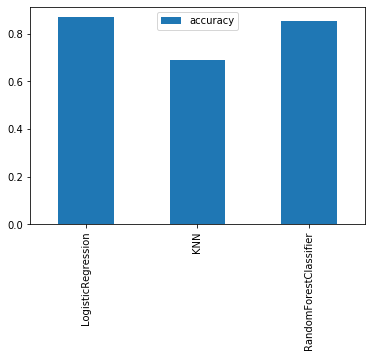

In [36]:
model_compare.T.plot.bar();

## Improving a model

# After a baseline prediction 
# Check

* Hyperparameter tuning
* Feature importance
* Confusion_matrix
* Cross_validation
* Precision
* Recall
* F1 score
* Classification report
* Roc (Receiver operator characteristics)
* Auc (Area under the curve)

In [37]:
# Improving a model

train_score = []
test_score = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

# loop through

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train,y_train)
    
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))
    

In [38]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [39]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

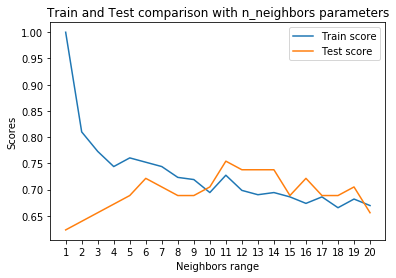

In [40]:
plt.plot(neighbors, train_score, label = 'Train score')
plt.plot(neighbors, test_score, label = 'Test score')
plt.title('Train and Test comparison with n_neighbors parameters')
plt.xlabel('Neighbors range')
plt.ylabel('Scores')
plt.legend()
plt.xticks(np.arange(1,21,1));

## HyperParameter tuning with randomizedsearchcv

In [41]:
# NOow we create  grid for Logistic regression and Randomforestclassifier

# grid for Logistic regression

log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver': ['liblinear']}
# grid for Randomforestclassifier

rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None,3,4,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}
    

## Through Logistic regression Score Imroved using randomsearch

In [42]:
# Setup randomizedsearchcv
# First try randomized searchcv on logisticregression
randomized = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv =5,
                                n_iter= 20,
                                verbose=True)
np.random.seed(42)
# Apply Randomized searchcv on data
randomized.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

{'LogisticRegression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8524590163934426}

In [43]:
# Now Test the score with Logisticregression
randomized.score(X_test,y_test) * 100

88.52459016393442

In [44]:
#  Lets try with the Randomforestclassifier
randomized2 = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions=rf_grid,
                                 cv = 5,
                                 n_iter= 20,
                                 verbose= True)
# Now fit this on data
randomized2.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   59.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

{'LogisticRegression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8524590163934426}

## Through Randomforestclassifier Score also Improved using randomsearch

In [45]:
randomized2.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 4}

In [46]:
# Now test this on randomforestclassifer
randomized2.score(X_test,y_test)*100

86.88524590163934

## Tuning of hyperparameters using Gridsearchcv

In [47]:
# grid for logistic regression

log_reg_grid = {'C': np.logspace(-4,4,30),
                 'solver': ['liblinear']}

    
# grid for randomforestclassifier

rf_grid_grid = {'n_estimators': np.arange(10,1000,50),
               'max_depth': [None,3,4,10],
               'min_samples_split':np.arange(2,20,2),
               'min_samples_leaf':np.arange(1,20,2)}


In [48]:
# Lets try with the logisticregression

grid1 = GridSearchCV(LogisticRegression(),
                     param_grid=log_reg_grid,
                     cv = 5,
                     n_jobs= -1,
                     verbose= 5)

# Now fit Gridsearch on logisticregression
np.random.seed(42)

grid1.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 112 out of 150 | elapsed:    2.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

{'LogisticRegression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8524590163934426}

In [49]:
# Best parameters are
grid1.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

## Through logistic regression score remain the same using grid searchcv

In [50]:
# Now test this 
grid1.score(X_test,y_test)*100

88.52459016393442

## Evaluate machine learning classifier

* Hyperparameter tuning (Done)
* Feature Importance 
* Area under curve
* Roc curve (Receiver operator characteristics)
* Classification reports
* Precision
* Confusion matrix
* Recall
* F1

In [51]:
# Make predictions with tune model
y_preds = grid1.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [53]:
# Roc curve

y_probs = grid1.predict_proba(X_test)
y_probs[:10]

array([[0.86725271, 0.13274729],
       [0.24408499, 0.75591501],
       [0.18547577, 0.81452423],
       [0.94530777, 0.05469223],
       [0.11546641, 0.88453359],
       [0.12929705, 0.87070295],
       [0.3948782 , 0.6051218 ],
       [0.99564019, 0.00435981],
       [0.98623623, 0.01376377],
       [0.43861534, 0.56138466]])

In [54]:
y_probs_positive = y_probs[:,1]

In [55]:
y_probs_positive[:10]

array([0.13274729, 0.75591501, 0.81452423, 0.05469223, 0.88453359,
       0.87070295, 0.6051218 , 0.00435981, 0.01376377, 0.56138466])

In [56]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

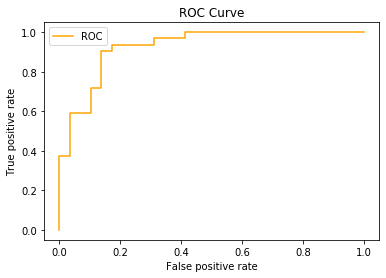

In [57]:
# Creating a function for plotting roc curve
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr, color = 'orange', label = 'ROC')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')
    plt.legend()
    
plot_roc_curve(fpr,tpr)

In [58]:
roc_auc_score(y_test,y_probs_positive)*100

92.56465517241381

In [59]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


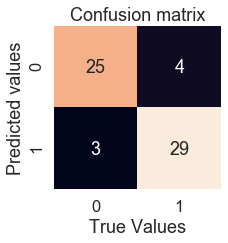

In [60]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot = True,
                     cbar = False)
    plt.title('Confusion matrix')
    plt.xlabel('True Values')
    plt.ylabel('Predicted values')
    
plot_conf_mat(y_test,y_preds)

## Classification imports without cross validation

In [61]:
# Classification imports
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate the evaluation metrics with cross valiation

In [62]:
# Check the best hyperparameters
grid1.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [63]:
# Now create new classifier with best parameters 

clf = LogisticRegression(C = 0.2043, solver = 'liblinear' )

In [64]:
# Cross validation accuracy

cv_acc = cross_val_score(clf, X,y, scoring = 'accuracy',cv = 5)
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [92]:
# Take mean of it
cv_acc = np.mean(cv_acc)
cv_acc


84.79781420765026

In [95]:
# Cross validation precision

cv_pre = cross_val_score(clf, X, y , cv = 5, scoring = 'precision')

cv_pre = np.mean(cv_pre)
cv_pre*100

82.15873015873015

In [96]:
# Cross validation recall score

cv_re = cross_val_score(clf, X, y , cv = 5, scoring = 'recall')

cv_re = np.mean(cv_re)
cv_re*100

92.72727272727273

In [97]:
# Cross validation f1 score

cv_f1 = cross_val_score(clf,X,y,cv = 5 , scoring = 'f1')

cv_f1 = np.mean(cv_f1)
cv_f1*100

87.05403543192143

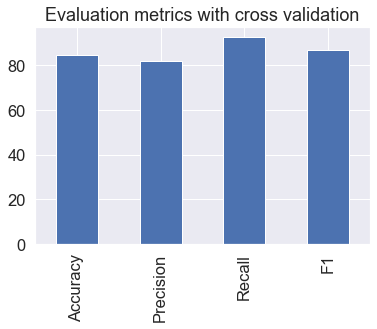

In [69]:
# Now visualize cross validation metrics

cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'Precision':cv_pre,
                           'Recall': cv_re,
                           'F1':cv_f1},
                          index = [0])
cv_metrics.T.plot.bar(title = 'Evaluation metrics with cross validation',
                      legend = []);

## Feature Importance

is another as asking "which features contributes most of the outcomes of the model and how they contributed?"

In [70]:
# Finding feature importance is different for each model

In [71]:

grid1.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [72]:
# Fit a model instance
clf = LogisticRegression(C = 0.2043, solver = 'liblinear')

clf.fit(X_train,y_train);

In [73]:
# Check coef_
clf.coef_

array([[ 0.00316654, -0.86038561,  0.6606513 , -0.0115699 , -0.00166369,
         0.04385464,  0.312732  ,  0.02459341, -0.60409354, -0.56861851,
         0.45048902, -0.63607904, -0.67660557]])

In [74]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
# Match coefs of features to columns
feature_dict = dict(zip(data.columns,list(clf.coef_[0])))

In [80]:
feature_dict

{'age': 0.0031665426466555135,
 'sex': -0.8603856097286842,
 'cp': 0.6606513036660141,
 'trestbps': -0.011569896065445388,
 'chol': -0.0016636860388651007,
 'fbs': 0.04385463747056042,
 'restecg': 0.31273199736597174,
 'thalach': 0.024593412658480297,
 'exang': -0.6040935429803241,
 'oldpeak': -0.568618508267554,
 'slope': 0.4504890169033005,
 'ca': -0.6360790403764787,
 'thal': -0.6766055671222163}

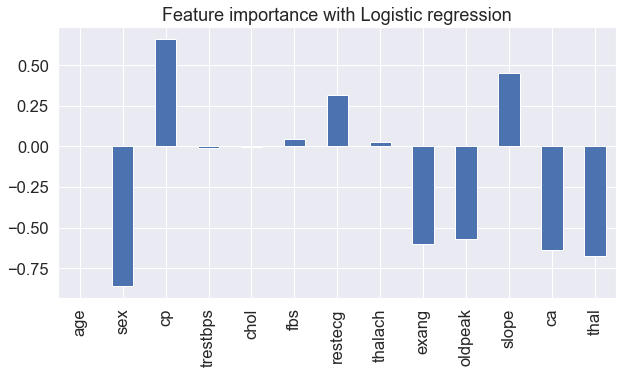

In [85]:
# Now visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature importance with Logistic regression',
                    legend = [], figsize  = (10,5))

In [86]:
pd.crosstab(data.sex, data.target)

target,0,1
sex,,
0,24,72
1,114,93


In [88]:
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [89]:
pd.crosstab(data.slope,data.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
